# Use Track Anything for Segmentation

Use GPU for this section

Track Anything Github Page: https://github.com/gaomingqi/Track-Anything

In [ ]:
!git clone https://github.com/healthonrails/Track-Anything.git   # cloning repository

Cloning into 'Track-Anything'...
remote: Enumerating objects: 1031, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1031 (delta 240), reused 228 (delta 228), pack-reused 745
Receiving objects: 100% (1031/1031), 333.77 MiB | 14.42 MiB/s, done.
Resolving deltas: 100% (532/532), done.


In [ ]:
%cd Track-Anything/     # changing the working directory to the cloned repository

/content/Track-Anything


In [ ]:
def change_gradio_version(old_filename) -> str:  # This step is needed to update Gradio to a newer version
    import re
    from pathlib import Path
    # Read the contents of the file
    with open(old_filename, "r") as f:
        contents = f.read()
    # Define the regular expression pattern
    pattern = r"gradio==3.25.0"
    # Use the sub method to replace the text
    contents = re.sub(pattern, "gradio==3.28.3", contents)
    # Write the modified contents back to the file
    new_filename = Path(old_filename).parent / f"{Path(old_filename).stem}_modified.txt"
    with open(new_filename, "w") as f:
        f.write(contents)

    return new_filename.name


change_gradio_version('requirements.txt')  # change version of Gradio to 3.28.3

'requirements_modified.txt'

In [ ]:
!pip install -r requirements_modified.txt  # install newly modified requirements for Track Anything

  Cloning https://github.com/cheind/py-thin-plate-spline to /tmp/pip-req-build-cg1e1_b8
  Running command git clone --filter=blob:none --quiet https://github.com/cheind/py-thin-plate-spline /tmp/pip-req-build-cg1e1_b8
  Resolved https://github.com/cheind/py-thin-plate-spline to commit f6995795397118b7d0ac01aecd3f39ffbfad9dee
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-kdf2s2tf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-kdf2s2tf
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 20.3 MB/s 

In [ ]:
!python app.py --device cuda:0  # run the Gradio demo for Track Anything

# Open the "Running on public URL:" link when it pops up.
# Tutorial for the demo can be found here: https://github.com/gaomingqi/Track-Anything/blob/master/doc/tutorials.md
# Video might not play in browser if it's not an mp4
# Once satisfied with tracking results, download output video to files and upload to Google Drive

/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:103: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:103: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 35.2 MB/s eta 0:00:00
download checkpoints ......
download successfully!
download checkpoints ......
download successfully!
Dow

Track Anything demo can also be run on Hugging Face:
https://huggingface.co/spaces/VIPLab/Track-Anything

# Importing Libraries for Velocity Calculations

A GPU is not necessary beyond this point, so connecting to a new runtime without one would conserve resources

In [ ]:
from google.colab import drive # mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Storing Video Frames as Images

In [ ]:
folder_path = '/content/drive/MyDrive/Image Segmentation for High-Speed Collision/Tracking Objects Data/Tracking Object 5/'  # path to the desired folder in Google Drive
video_name = '1_object5_video.mp4'  # name of desired video in folder
image_name = 'object5_frame_'  # desired name for images of individual frames which will be saved to the same Drive folder (note that a number will be added to the end to denote the frame number)

In [ ]:
vidcap = cv2.VideoCapture(folder_path + video_name) # loading video from Google Drive
success,image = vidcap.read() # reading video as individual frames
count = 1
while success:
  cv2.imwrite(folder_path + image_name + '{}.png'.format(count), image) # saving each frame to Google Drive
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

# Locating and Counting Pixels in the Mask

In [ ]:
height = 720      # height of image in pixels
width = 1280       # width of image in pixels

start_frame = 169  # first desired frame to use for regression/velocity calculation
end_frame = 268    # last desired frame to use for regression/velocity calculation

In [ ]:
pixel_counts = []
centroid_x_coordinates = []
centroid_y_coordinates = []

for x in range(start_frame,end_frame + 1):    # looping over the desired number of frames
  im = Image.open(folder_path + image_name + '{}.png'.format(x))   # load each frame from Google Drive
  data = im.getdata()     # storing image as array of RGB pixels
  locations = [pixel for pixel in range(len(data)) if data[pixel][0] > 150 and data[pixel][2] < data[pixel][0]]   # creating list of all orange pixels
  x_coords = [int(u%width) for u in locations]    # creating list of x-coordinates of all orange pixels
  y_coords = [int(u/width) for u in locations]    # creating list of y-coordinates of all orange pixels
  area = len(locations)             # counting total number of orange pixels
  centroid_x = np.mean(x_coords)    # calculating x-coordinate of centroid
  centroid_y = np.mean(y_coords)    # calculating y-coordinate of centroid
  pixel_counts.append(area)
  centroid_x_coordinates.append(centroid_x)
  centroid_y_coordinates.append(centroid_y)

print(pixel_counts)
print(centroid_x_coordinates)
print(centroid_y_coordinates)

[890, 937, 991, 976, 985, 980, 1055, 1128, 1128, 1165, 1166, 1330, 1313, 1363, 1388, 1503, 1617, 1627, 1643, 1834, 1841, 2126, 2128, 1983, 1988, 1988, 2269, 2268, 2154, 2111, 2600, 2728, 2831, 2845, 2618, 2595, 2362, 2365, 2371, 2380, 2562, 2560, 2623, 2636, 2976, 2984, 3128, 3107, 3118, 2878, 2891, 3001, 2996, 3274, 3321, 3068, 3110, 3253, 3273, 3203, 3202, 3295, 3282, 3691, 3698, 3829, 3608, 3359, 3357, 3359, 3296, 3304, 3334, 3331, 3258, 3255, 3153, 3133, 3181, 3179, 2859, 2887, 1638, 1653, 1933, 1943, 2002, 2008, 2110, 2135, 2144, 2133, 2133, 2072, 2072, 2190, 2219, 2148, 2133, 2275]
[956.3988764044943, 957.0117395944503, 957.1130171543895, 957.0799180327868, 957.048730964467, 963.1244897959184, 962.4407582938388, 964.5292553191489, 964.5292553191489, 969.7871244635193, 969.7958833619211, 972.7804511278196, 972.9131759329779, 977.3815113719736, 977.2031700288185, 980.4045242847639, 980.5658627087198, 983.0540872771973, 982.9087035909921, 985.8287895310796, 985.7582835415535, 990.00

## Save/Load Data With CSV File if Desired

In [ ]:
csv_file_name = 'object5_data.csv'  # naming the csv file

Save fragment data to csv file

In [ ]:
data = np.array([pixel_counts, centroid_x_coordinates, centroid_y_coordinates])
np.savetxt(folder_path + csv_file_name, data, delimiter = ',')  # saving csv file to the same folder used above

Load fragment data from csv file

In [ ]:
data = np.loadtxt(folder_path + csv_file_name, delimiter = ',')  # loading data from csv file

pixel_counts = data[0]
centroid_x_coordinates = data[1]
centroid_y_coordinates = data[2]

## Graphing Inverse Area Over Time

In [ ]:
fput = 2       # frames per unit time for the video - ex: 4 frames = 1 microsecond

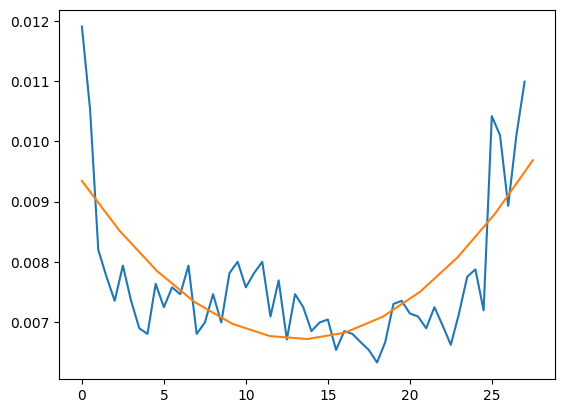

           2
1.478e-05 x - 0.0003942 x + 0.009343


In [ ]:
frames = [n for n in range(len(pixel_counts))]
time = [n/fput for n in frames]         # converting frames to time
invArea = [1/n for n in pixel_counts]   # converting area to inverse area

#polynomial fit with degree = 2
quadregression = np.poly1d(np.polyfit(time, invArea, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, len(time)/fput, int(len(time)/4))
plt.plot(time, invArea)
plt.plot(polyline, quadregression(polyline))
plt.show()

print(quadregression)

## Graphing X-Coordinate of Centroid Over Time

In [ ]:
fput = 2       # frames per unit time for the video - ex: 4 frames = 1 microsecond

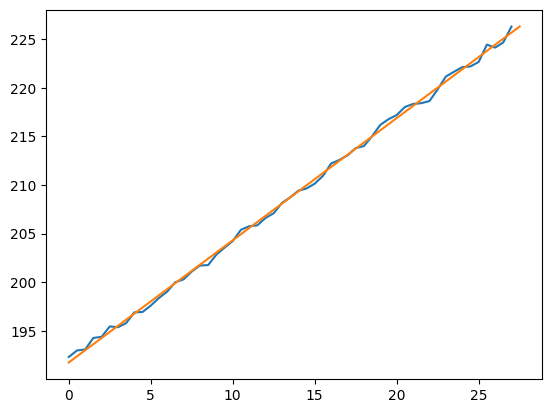

 
1.256 x + 191.8


In [ ]:
frames = [n for n in range(len(centroid_x_coordinates))]
time = [n/fput for n in frames]     # converting frames to time

#polynomial fit with degree = 1
xlinregression = np.poly1d(np.polyfit(time, centroid_x_coordinates, 1))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, len(time)/fput, int(len(time)/4))
plt.plot(time, centroid_x_coordinates)
plt.plot(polyline, xlinregression(polyline))
plt.show()

print(xlinregression)

## Graphing Y-Coordinate of Centroid Over Time

In [ ]:
fput = 2       # frames per unit time for the video - ex: 4 frames = 1 microsecond

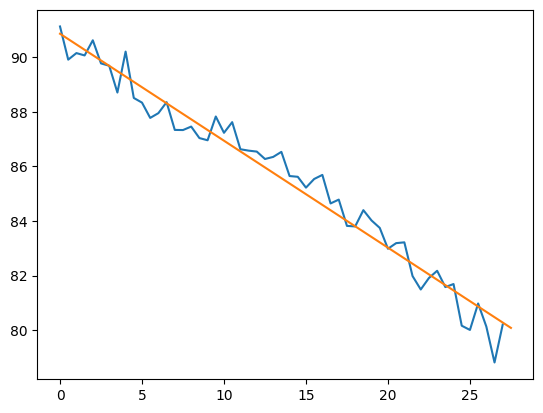

 
-0.392 x + 90.86


In [ ]:
frames = [n for n in range(len(centroid_y_coordinates))]
time = [n/fput for n in frames]     # converting frames to time

#polynomial fit with degree = 1
ylinregression = np.poly1d(np.polyfit(time, centroid_y_coordinates, 1))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, len(time)/fput, int(len(time)/4))
plt.plot(time, centroid_y_coordinates)
plt.plot(polyline, ylinregression(polyline))
plt.show()

print(ylinregression)

# Calculating Velocity and Area of Fragment

Input the known constants into the code block below:

In [ ]:
D = .01      # initial distance of object from camera in meters
F = .06     # focal length of camera in meters
pd = 6.25   # pixel density in pixels per square millimeter - ex: 1 mm² = 1330 pixels
convert_time = 10**6    # number of current time units per second - ex: 1 second = 10⁶ microseconds

Calculate velocities:

In [ ]:
zcoefs = quadregression.c        # retrieving coefficients of regression equations
xcoefs = xlinregression.c
ycoefs = ylinregression.c

initial_vz = D * ((zcoefs[0]/zcoefs[2])**.5) # calculating velocity in original time units
vz = initial_vz * convert_time   # converting z-velocity to m/s
a = ((D/F)**2)/(zcoefs[2]*pd)    # calculating area in mm²

vx = (xcoefs[0]*convert_time)/((10**3)*(pd**.5))    # calculating x-velocity in m/s
vy = (ycoefs[0]*convert_time)/((10**3)*(pd**.5))    # calculating y-velocity in m/s

print("z-velocity in m/s: " + str(vz))
print("area in mm²: " + str(a))
print("potential x-velocity in m/s: " + str(vx))
print("potential y-velocity in m/s: " + str(vy))

z-velocity in m/s: 397.81218910954703
area in mm²: 0.4757219814282449
potential x-velocity in m/s: 502.4642493918835
potential y-velocity in m/s: -156.78740750388155


Z-velocity is the component of velocity directed out of the video plane

Area is an estimation of the average area of all faces of the object that faced the camera during the tracking period

X-velocity and y-velocity are both in-plane, but I don't think the calculation is done correctly for them, so these two values can be ignored

# Possible Kinetic Energy Estimation With Equivalent Spheres?

In [ ]:
density = 1.77   # density of the material in grams per centimeter³

In [ ]:
v = ((vx**2) + (vy**2) + (vz**2)) ** .5   # calculating total velocity from components

r_unconverted = (a/3.14159) ** .5   # using average area to calculate radius of equivalent sphere
r = r_unconverted / 10  # converting radius from millimeters to centimeters
volume = (4/3) * 3.14159 * (r**3)   # calculating volume of equivalent sphere

mass_unconverted = density * volume # using volume and density to find mass
mass = mass_unconverted / 1000 # converting mass from grams to kilograms

ke = .5 * mass * (v**2)   # calculating kinetic energy with mass and total velocity

print("total velocity in m/s: " + str(v))
print("estimated volume in cm³: " + str(volume))
print("estimated mass in kg: " + str(mass))
print("estimated kinetic energy in J: " + str(ke))

total velocity in m/s: 659.7781073003765
estimated volume in cm³: 0.0002468276522273245
estimated mass in kg: 4.3688494444236435e-07
estimated kinetic energy in J: 0.09508957021222825
